# Project Assignment : Applied Statistics

## Context:

Leveraging and Exploring customer information in insurance sector is crucial to help on business decisions


## Attribute Information:

age : age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

charges: Individual medical costs billed by health insurance


## Tasks:


### 1. Import the necessary libraries

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

sns.set(color_codes=True)  #to add background to graphs
%matplotlib inline  

### 2. Read the data as a data frame

In [235]:
insure_df = pd.read_csv("insurance.csv")  # to read the dataset
insure_df.head()  # to view first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Perform basic EDA which should include the following and print out your insights at every step

### a. Shape of the data

In [236]:
print("Shape : ", insure_df.shape) # to see shape of data (rows and columns)
print("Size : ", insure_df.size)  # to get row count

Shape :  (1338, 7)
Size :  9366


### b. Data type of each attribute

In [237]:
print(insure_df.info())  # to see data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### c. Checking the presence of missing values

In [238]:
# number of missing values in each attributes
pd.DataFrame(insure_df.isnull().sum(), columns =['Number of missing values'])


,Number of missing values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [239]:
if insure_df.isnull().values.any() == False :
    print("Dataset does not have any recognised missing values in any of the columns")
else :
    print("Dataset has {} recognised missing values".format(insure_df.isnull().sum().sum()))


Dataset does not have any recognised missing values in any of the columns


#### Observation : 
No recognized missing values in any of the columns

### d. 5 point summary of numerical attributes

In [242]:
insure_df.describe().T      # five number summary of numericl attributes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

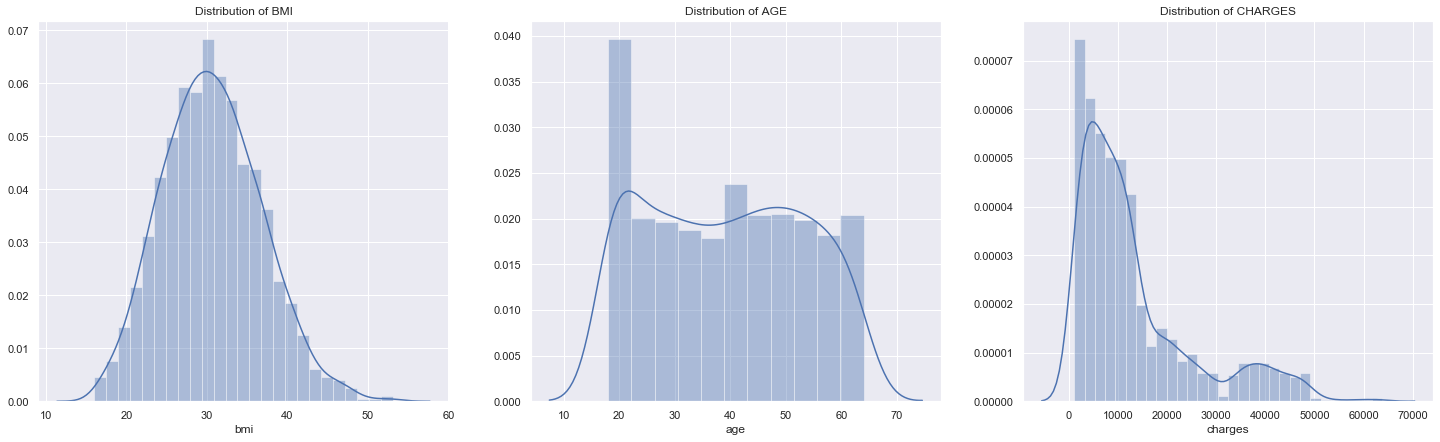

In [243]:
fig, ax = plt.subplots(1, 3)

fig.set_figheight(7)
fig.set_figwidth(25)

sns.distplot(insure_df.loc[:, 'bmi'], ax = ax[0])
sns.distplot(insure_df.loc[:, 'age'], ax = ax[1])
sns.distplot(insure_df.loc[:, 'charges'], ax = ax[2])

ax[0].set_title('Distribution of BMI')
ax[1].set_title('Distribution of AGE')
ax[2].set_title('Distribution of CHARGES')
plt.show()

#### Observation : 

bmi : normally distributed

age : uniformally distributed

charges : right skewed


### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [244]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(insure_df.bmi),
                                       stats.skew(insure_df.age),
                                       stats.skew(insure_df.charges)]},
                       index = ['bmi', 'age', 'charges'])

Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


#### Observation : 

bmi : less skewed

age : no skew or hardly any skew

charges : right skewed


### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

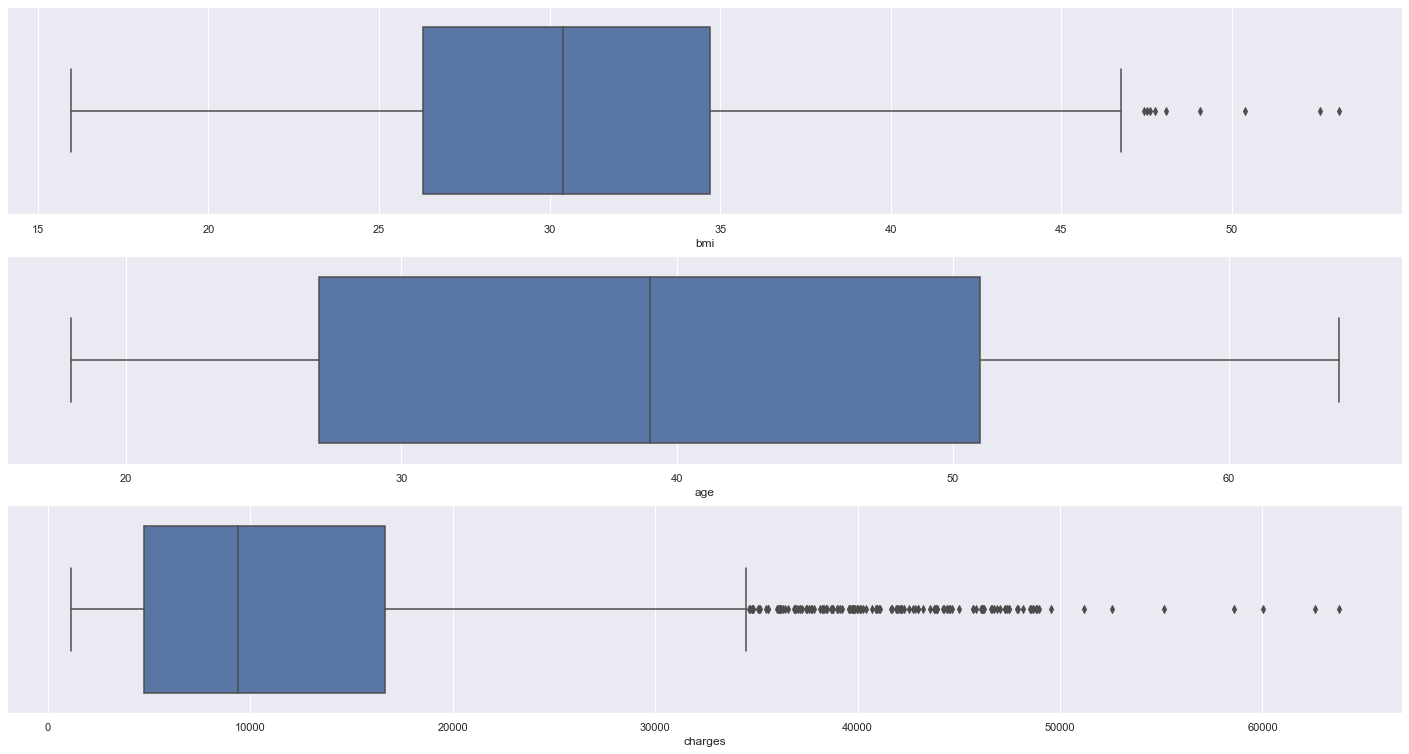

In [245]:
# We will plot the box plots on each (bmi, age, charges) and check if there are any outliers
fig, ax = plt.subplots(1, 3)
fig.set_figheight(13)
fig.set_figwidth(25)

plt.subplot(3,1,1)
sns.boxplot(insure_df['bmi'])

plt.subplot(3,1,2)
sns.boxplot(insure_df['age'])

plt.subplot(3,1,3)
sns.boxplot(insure_df['charges'])

plt.show()


In [246]:
# Try getting number of outliers for each (bmi, age, charges)

# outliers for bmi
q25, q75 = np.percentile(insure_df['bmi'], 25), np.percentile(insure_df['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliersBmi = [x for x in insure_df['bmi'] if x < lower or x > upper]

# outliers for age
q25, q75 = np.percentile(insure_df['age'], 25), np.percentile(insure_df['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliersAge = [x for x in insure_df['age'] if x < lower or x > upper]

# outliers for charges
q25, q75 = np.percentile(insure_df['charges'], 25), np.percentile(insure_df['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliersCharges = [x for x in insure_df['charges'] if x < lower or x > upper]

print('Identified outliers for bmi : %d' % len(outliersBmi))
print('Identified outliers for age : %d' % len(outliersAge))
print('Identified outliers for charges : %d' % len(outliersCharges))

Identified outliers for bmi : 9
Identified outliers for age : 0
Identified outliers for charges : 139


#### Observation : 

bmi : has some outliers

age : no outliers

charges : has more outliers with large values


### h. Distribution of categorical columns (include children)

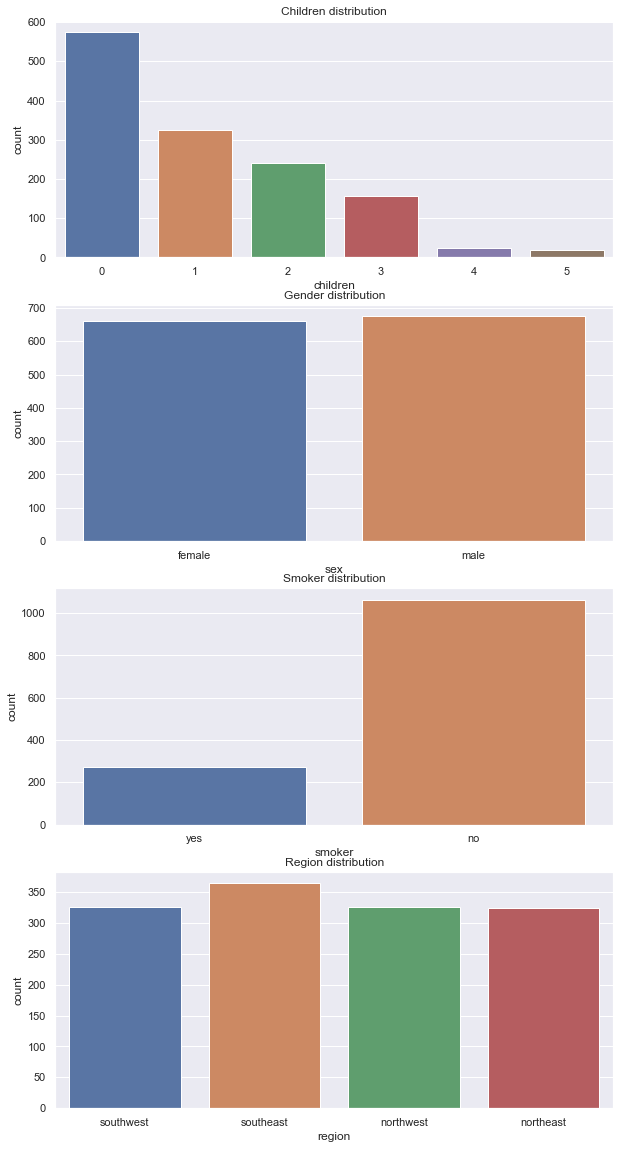

In [247]:
# Four categorical variables Children, Region, Sex, Smoker
# We will plot count plot to show distribution on each of these

fig, ax = plt.subplots(1, 4)
fig.set_figheight(20)
fig.set_figwidth(10)

plt.subplot(4,1,1)
sns.countplot(insure_df['children'])
plt.title('Children distribution')

plt.subplot(4,1,2)
sns.countplot(insure_df['sex'])
plt.title('Gender distribution')

plt.subplot(4,1,3)
sns.countplot(insure_df['smoker'])
plt.title('Smoker distribution')

plt.subplot(4,1,4)
sns.countplot(insure_df['region'])
plt.title('Region distribution')

plt.show()


#### Observation : 

Children : More than 50% has no children or one children

Gender : Male and Female are equally distributed

Smoker : Less smokers and more Non-Smokers

Region : Uniformly distributed across regions

### i. Pair plot that includes all the columns of the data frame

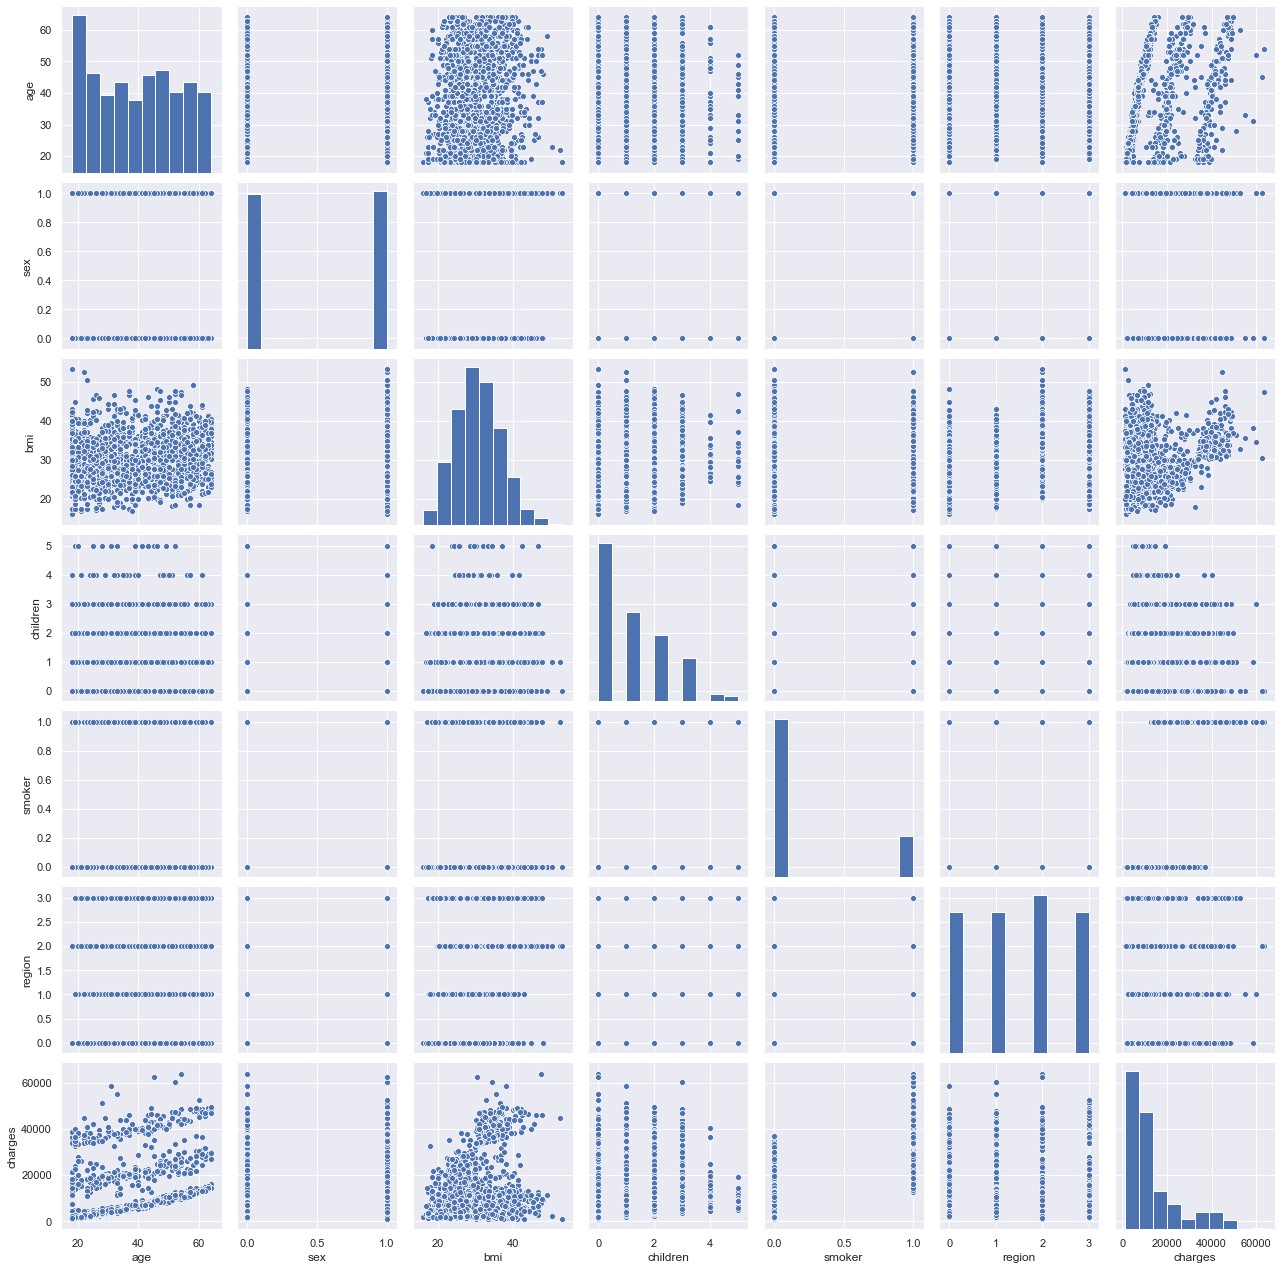

In [248]:
#PairPlot ingores String columns (sex, smoker, region)
#Encode Lables of string columns to include them in pairplot
insure_encoded = copy.deepcopy(insure_df)
insure_encoded.loc[:,['sex', 'smoker', 'region']] = insure_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insure_encoded)
plt.show()

### 4. Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

#### Use T-test to find P value

* H<sub>0</sub>: x&#772;<sub>1</sub> = x&#772;<sub>2</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> = 0,  there is no difference between the Charges of Smoker and Non-Smoker
* H<sub>A</sub>: x&#772;<sub>2</sub> < x&#772;<sub>1</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> < 0, there is difference between the Charges of Smoker and Non-Smoker
* &alpha; = 0.05

[t-table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)


In [249]:
# t-test
Ho = "Charges of Smoker and Non-Smoker are same"
Ha = "Charges of Smoker and Non-Smoker are not same"
alpha = 0.05

x = np.array(insure_df[insure_df.smoker == 'yes'].charges)
y = np.array(insure_df[insure_df.smoker == 'no'].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < alpha:
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')



Charges of Smoker and Non-Smoker are not same as the p_value (8.271435842177219e-283) < 0.05


#### Observation : 
Charges of people who Smoke differs significantly from Non-Smoker. This is proved statistically using independent t-test, p-value < 0.05

Rejecting the Null Hypothesis (Ho)

### b. Does bmi of males differ significantly from that of females?

#### Use T-test to find P value

* H<sub>0</sub>: x&#772;<sub>1</sub> = x&#772;<sub>2</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> = 0, there is no difference between the Bmi of Male and Female
* H<sub>A</sub>: x&#772;<sub>2</sub> < x&#772;<sub>1</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> < 0, there is difference between the Bmi of Male and Female
* &alpha; = 0.05

[t-table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)


In [250]:
# t-test
Ho = "Bmi of Male and Female are same"
Ha = "Bmi of Male and Female are not same"
alpha = 0.05

x = np.array(insure_df[insure_df.sex == 'male'].bmi)
y = np.array(insure_df[insure_df.sex == 'female'].bmi)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < alpha:
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')



Bmi of Male and Female are same as the p_value (0.08997637178984932) > 0.05


#### Observation : 

Bmi of Male and Females are same, no impact due to Gender. This is proved statistically using independent t-test, p-value > 0.05

Fail to Reject (Accepting) the Null Hypothesis (Ho)

### c. Is the proportion of smokers significantly different in different genders? 

#### Use Chi-Square test to find P value

* H<sub>0</sub>: there is no effect on Smoking Habbits due to Gender
* H<sub>A</sub>: there is effect on Smoking Habbits due to Gender
* &alpha; = 0.05

[t-table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)


In [251]:
# chi-square test
Ho = "Gender has no effect on Smoking Habbits"
Ha = "Gender has no effect on Smoking Habbits"
alpha = 0.05

crosstab = pd.crosstab(insure_df['sex'], insure_df['smoker'])
chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < alpha:
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Gender has no effect on Smoking Habbits as the p_value (0.006548143503580696) < 0.05


#### Observation : 
Gender has no impact on smoking habbits. This is proved statistically using independent t-test, p-value < 0.05

Rejecting the Null Hypothesis (Ho)

### d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [252]:
# anova-test
Ho = "Number of Children for Females has no effect on Bmi"
Ha = "Number of Children for Females has effect on Bmi"
alpha = 0.05

insure_female = copy.deepcopy(insure_df[insure_df['sex'] == 'female'])

no_child = insure_female[insure_female.children == 0]['bmi']
one_child = insure_female[insure_female.children == 1]['bmi']
two_child = insure_female[insure_female.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(no_child, one_child, two_child)

if p_value < alpha:
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')


Number of Children for Females has no effect on Bmi as the p_value (0.7158579926754841) > 0.05


#### Observation : 

Bmi of Females has no impact due to Children. This is proved statistically using independent t-test, p-value > 0.05

Fail to Reject (Accepting) the Null Hypothesis (Ho)